In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!git clone https://github.com/hyeshik/colab-biolab.git
!cd colab-biolab && bash tools/setup.sh
exec(open('colab-biolab/tools/activate_conda.py').read())

Cloning into 'colab-biolab'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 76 (delta 26), reused 59 (delta 15), pack-reused 0 (from 0)
Receiving objects: 100% (76/76), 318.16 KiB | 5.78 MiB/s, done.
Resolving deltas: 100% (26/26), done.
./
./root/
./root/.condarc
./root/.bashrc.biolab
./root/.bin.priority/
./root/.bin.priority/pip3
./root/.bin.priority/pip2
./root/.bin.priority/pip
./root/.profile
./root/.vimrc
./root/.tmux.conf
--2025-06-09 02:50:57--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 155472915 (148M) [application/octet-stream]
Saving to: ‘miniconda3.sh’

miniconda3.sh       100%[===================>] 1

In [3]:
!conda install -y subread

Channels:
 - conda-forge
 - bioconda
 - defaults
Platform: linux-64
Solving environment: - \ done


==> WARNING: A newer version of conda exists. <==
    current version: 25.3.1
    latest version: 25.5.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /root/conda

  added / updated specs:
    - subread


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.4.26  |       hbd8a1cb_0         149 KB  conda-forge
    conda-25.5.1               |  py313h78bf25f_0         1.1 MB  conda-forge
    subread-2.0.1              |       h5bf99c6_1        22.8 MB  bioconda
    ------------------------------------------------------------
                                           Total:        24.1 MB

The following NEW packages will be INSTALLED:

  subread            bioconda/linux-64::subread-2.0.1-h5bf9

In [4]:
%cd /content/drive/MyDrive/binfo1-work/

/content/drive/MyDrive/binfo1-work


In [5]:
!ls
!pwd

CLIP-35L33G.bam		mgi_ensembl.gaf		 RNA-siLin28a.bam
CLIP-35L33G.bam.bai	mgi.gaf			 RNA-siLin28a.bam.bai
CLIP-let7g.bam		read-counts.txt		 RNA-siLuc.bam
CLIP-let7g-gene.pileup	read-counts.txt.summary  RPF-siLin28a.bam
CLIP-let7g.pileup	RNA-control.bam		 RPF-siLuc.bam
go_ensembl		RNA-control.bam.bai
/content/drive/MyDrive/binfo1-work


In [6]:
!featureCounts -h

featureCounts: invalid option -- 'h'

Version 2.0.1

Usage: featureCounts [options] -a <annotation_file> -o <output_file> input_file1 [input_file2] ... 

## Mandatory arguments:

  -a <string>         Name of an annotation file. GTF/GFF format by default. See
                      -F option for more format information. Inbuilt annotations
                      (SAF format) is available in 'annotation' directory of the
                      package. Gzipped file is also accepted.

  -o <string>         Name of output file including read counts. A separate file
                      including summary statistics of counting results is also
                      included in the output ('<string>.summary'). Both files
                      are in tab delimited format.

  input_file1 [input_file2] ...   A list of SAM or BAM format files. They can be
                      either name or location sorted. If no files provided,
                      <stdin> input is expected. Location-sorted pai

In [25]:
%cd /content/drive/MyDrive/binfo1-work/

/content/drive/MyDrive/binfo1-work


In [26]:
!ls

CLIP-35L33G.bam		mgi_ensembl.gaf		 RNA-siLin28a.bam
CLIP-35L33G.bam.bai	mgi.gaf			 RNA-siLin28a.bam.bai
CLIP-let7g.bam		read-counts.txt		 RNA-siLuc.bam
CLIP-let7g-gene.pileup	read-counts.txt.summary  RPF-siLin28a.bam
CLIP-let7g.pileup	RNA-control.bam		 RPF-siLuc.bam
go_ensembl		RNA-control.bam.bai


In [10]:
!featureCounts -a gencode.gtf  -o /content/drive/MyDrive/YOA/read-counts.txt  CLIP-35L33G.bam	 RNA-control.bam		RNA-siLin28a.bam	RNA-siLuc.bam RPF-siLin28a.bam RPF-siLuc.bam


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v2.0.1

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 6 BAM files                                      ||
||                           o CLIP-35L33G.bam                                ||
||                           o RNA-control.bam                                ||
||                           o RNA-siLin28a.bam                               ||
||                           o RNA-siLuc.bam                     

In [27]:
import pandas as pd
cnts = pd.read_csv('read-counts.txt', sep='\t', comment='#', index_col=0)

In [28]:
import numpy as np
cnts['clip_enrichment'] = cnts['CLIP-35L33G.bam'] / cnts['RNA-control.bam']
cnts['rden_change'] = (cnts['RPF-siLin28a.bam'] / cnts['RNA-siLin28a.bam']) / (cnts['RPF-siLuc.bam'] / cnts['RNA-siLuc.bam'])

cnts['clip_enrichment_log2'] = np.log2(cnts['clip_enrichment'])
cnts['rden_change_log2'] = np.log2(cnts['rden_change'])

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


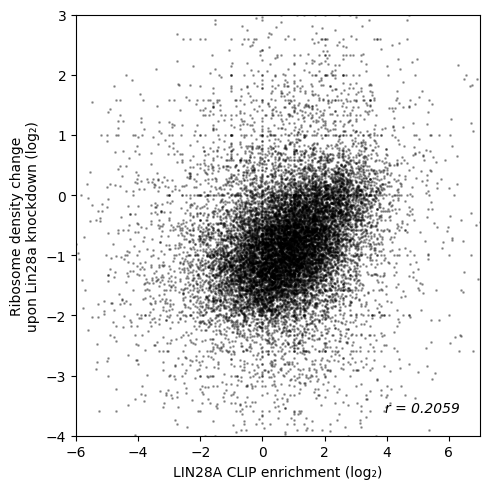

In [29]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

mask_valid = (cnts['clip_enrichment'] > 0) & (cnts['rden_change'] > 0)
x = np.log2(cnts.loc[mask_valid, 'clip_enrichment'])
y = np.log2(cnts.loc[mask_valid, 'rden_change'])

valid = ~(np.isinf(x) | np.isinf(y))
x = x[valid]
y = y[valid]

r, _ = pearsonr(x, y)

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(x, y, s=1, alpha=0.3, color='black')

ax.set_xlabel('LIN28A CLIP enrichment (log₂)')
ax.set_ylabel('Ribosome density change\nupon Lin28a knockdown (log₂)')
ax.set_xlim(-6, 7)
ax.set_ylim(-4, 3)

ax.text(0.95, 0.05, f'r = {r:.4f}', transform=ax.transAxes,
        ha='right', va='bottom', fontsize=10, style='italic')

plt.tight_layout()
plt.show()


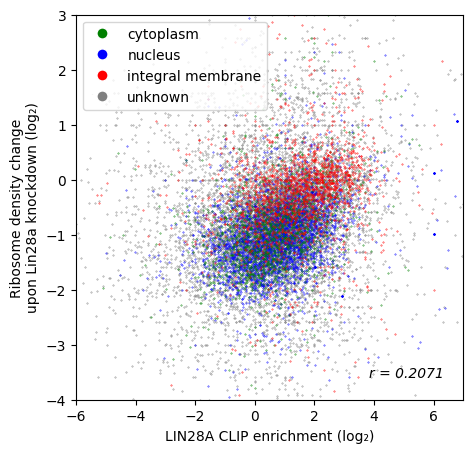

In [30]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import ssl

ax.set_ylabel('Ribosome density change\nupon Lin28a knockdown (log2)')
ax.set_xlabel(r'LIN28A CLIP enrichment (log2)')

ax.text(6.5,-2.95, f'r = {r:.4f}',
        fontsize=8, ha='right', va='bottom')
ssl._create_default_https_context = ssl._create_unverified_context
mouselocal = pd.read_csv('https://hyeshik.qbio.io/binfo/mouselocalization-20210507.txt', sep='\t')
mouselocal.rename(columns={'gene_id': 'Geneid'}, inplace=True)

# cnts_df = cnts

cnts = cnts.replace([np.inf, -np.inf], np.nan).dropna(subset=['clip_enrichment_log2', 'rden_change_log2'])
cnts.reset_index(inplace=True)
cnts['Geneid'] = cnts['Geneid'].str.split('.').str[0]
# cnts.head()
# mouselocal.head()
cnts_local = cnts.merge(mouselocal, how = 'left', on = 'Geneid')
# cnts_local.head()

cnts_local['type'] = cnts_local['type'].fillna('unknown')
colors = {'cytoplasm': 'green', 'nucleus': 'blue', 'integral membrane': 'red', 'unknown': 'gray'}

r, _ = pearsonr(cnts_local['clip_enrichment_log2'], cnts_local['rden_change_log2'])

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
for t in cnts_local['type'].unique():
    df_subset = cnts_local[cnts_local['type'] == t]
    ax.scatter(df_subset['clip_enrichment_log2'], df_subset['rden_change_log2'],
                color=colors[t], label=t, alpha=1, s = 0.1)

ax.set_ylabel('Ribosome density change\nupon Lin28a knockdown (log₂)')
ax.set_xlabel(r'LIN28A CLIP enrichment (log₂)')

ax.text(0.95, 0.05, f'r = {r:.4f}', transform=ax.transAxes,
        ha='right', va='bottom', fontsize=10, style='italic')
ax.set_xlim(-6, 7)
ax.set_ylim(-4, 3)
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=8, markerfacecolor=color)
                  for label, color in colors.items()]
ax.legend(handles=legend_handles)

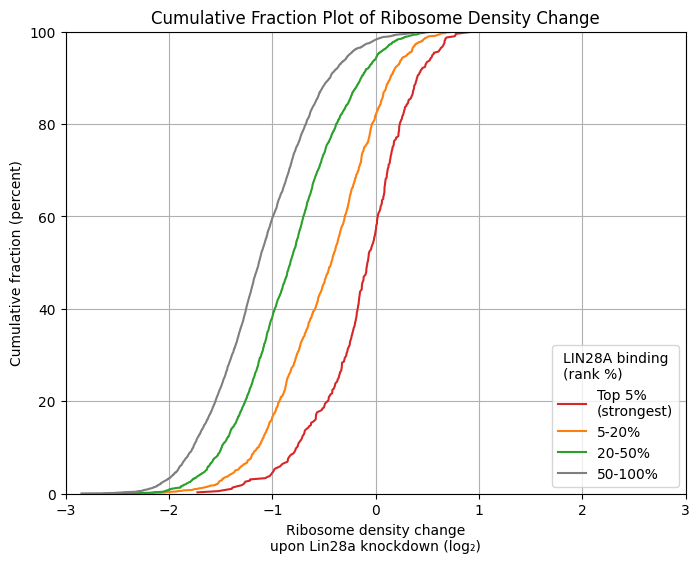

In [31]:

cnts_2 = cnts[(cnts['RNA-control.bam'] >= 30) & (cnts['RNA-siLuc.bam'] >= 80) & (cnts['RPF-siLuc.bam'] >= 80)]

cnts_2 = cnts_2.replace([np.inf, -np.inf], np.nan).dropna(subset=['clip_enrichment_log2', 'rden_change_log2'])
cnts_2['rank'] = cnts_2['clip_enrichment'].rank(ascending=False)
thrlist = [0.05, 0.20, 0.50, 1.00]
grouplist = ['Top 5%\n(strongest)', '5-20%', '20-50%', '50-100%']
perce = [cnts_2['rank'].quantile(q) for q in thrlist]
# for i in perce :
#   print(i)
cnts_2['group'] = pd.cut(cnts_2['rank'], bins=[0] + perce, labels=grouplist)

colormap = {
    'Top 5%\n(strongest)': '#d62728',
    '5-20%': '#ff7f0e',
    '20-50%': '#2ca02c',
    '50-100%': '#7f7f7f'
}

plt.figure(figsize=(8, 6))

for group in grouplist:
    datadata = cnts_2[cnts_2['group'] == group]['rden_change_log2'].sort_values()
    cumfrac = np.arange(1, len(datadata) + 1)* 100  / len(datadata)
    plt.plot(datadata,
             cumfrac,
             label=group,
             color=colormap[group])
    # plt.scatter(datadata,
    #             cumfrac,
    #             color=colormap[group],
    #             label=None)
plt.xlim(-3, 3)
plt.ylim(0, 100)
plt.xlabel('Ribosome density change\nupon Lin28a knockdown (log₂)')
plt.ylabel('Cumulative fraction (percent)')
plt.legend(title='LIN28A binding\n(rank %)', loc='lower right')
plt.title('Cumulative Fraction Plot of Ribosome Density Change')
plt.grid(True)
plt.show()

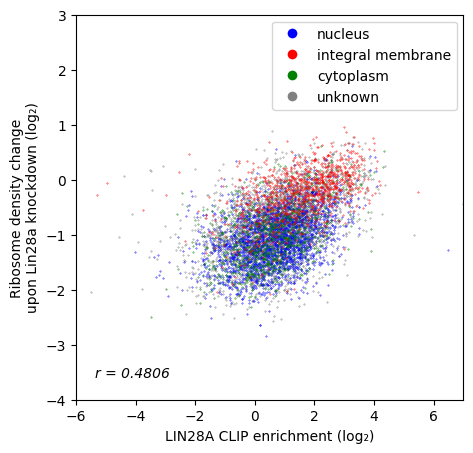

In [32]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import ssl


ax.set_ylabel('Ribosome density change\nupon Lin28a knockdown (log2)')
ax.set_xlabel(r'LIN28A CLIP enrichment (log2)')

ax.text(6.5,-2.95, f'r = {r:.4f}',
        fontsize=8, ha='right', va='bottom')
ssl._create_default_https_context = ssl._create_unverified_context
mouselocal = pd.read_csv('https://hyeshik.qbio.io/binfo/mouselocalization-20210507.txt', sep='\t')
mouselocal.rename(columns={'gene_id': 'Geneid'}, inplace=True)

cnts_df = cnts_2
r, p_value = pearsonr(cnts_df['clip_enrichment_log2'], cnts_df['rden_change_log2'])

cnts_df['Geneid'] = cnts_df['Geneid'].str.split('.').str[0]
cnts_df = cnts_df.merge(mouselocal, how = 'left', on = 'Geneid')
cnts_df['type'] = cnts_df['type'].fillna('unknown')
cnts_df.head()
colors = {'nucleus': 'blue', 'integral membrane': 'red', 'cytoplasm': 'green', 'unknown': 'gray'}
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
for t in cnts_df['type'].unique():
    df_subset = cnts_df[cnts_df['type'] == t]
    ax.scatter(df_subset['clip_enrichment_log2'], df_subset['rden_change_log2'],
                color=colors[t], label=t, alpha=1, s = 0.1)

ax.set_ylabel('Ribosome density change\nupon Lin28a knockdown (log₂)')
ax.set_xlabel(r'LIN28A CLIP enrichment (log₂)')

ax.text(0.05, 0.05, f'r = {r:.4f}', transform=ax.transAxes,
        ha='left', va='bottom', fontsize=10, style='italic')
# ax.set_xlim(-4, 6)
# ax.set_ylim(-3, 1)
ax.set_xlim(-6, 7)
ax.set_ylim(-4, 3)
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=8, markerfacecolor=color)
                  for label, color in colors.items()]
ax.legend(handles=legend_handles)

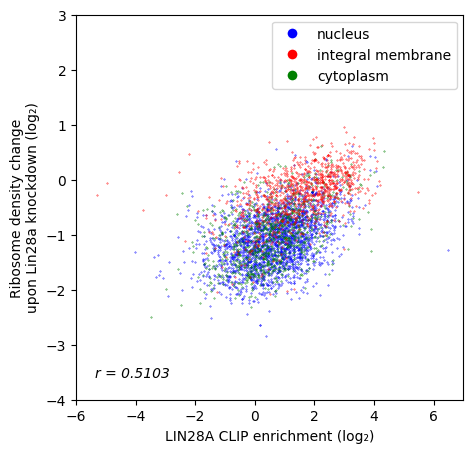

In [33]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import ssl


ax.set_ylabel('Ribosome density change\nupon Lin28a knockdown (log2)')
ax.set_xlabel(r'LIN28A CLIP enrichment (log2)')

ax.text(6.5,-2.95, f'r = {r:.4f}',
        fontsize=8, ha='right', va='bottom')
ssl._create_default_https_context = ssl._create_unverified_context
mouselocal = pd.read_csv('https://hyeshik.qbio.io/binfo/mouselocalization-20210507.txt', sep='\t')
mouselocal.rename(columns={'gene_id': 'Geneid'}, inplace=True)

cnts_df2 = cnts_2

cnts_df2['Geneid'] = cnts_df2['Geneid'].str.split('.').str[0]
cnts_df2 = cnts_df2.merge(mouselocal, how = 'left', on = 'Geneid')
cnts_df2['type'] = cnts_df2['type'].fillna('unknown')
cnts_df = cnts_df2[cnts_df2['type'] != 'unknown']
r, p_value = pearsonr(cnts_df['clip_enrichment_log2'], cnts_df['rden_change_log2'])

colors = {'nucleus': 'blue', 'integral membrane': 'red', 'cytoplasm': 'green'}
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
for t in cnts_df['type'].unique():
    df_subset = cnts_df[cnts_df['type'] == t]
    ax.scatter(df_subset['clip_enrichment_log2'], df_subset['rden_change_log2'],
                color=colors[t], label=t, alpha=1, s = 0.1)

ax.set_ylabel('Ribosome density change\nupon Lin28a knockdown (log₂)')
ax.set_xlabel(r'LIN28A CLIP enrichment (log₂)')

ax.text(0.05, 0.05, f'r = {r:.4f}', transform=ax.transAxes,
        ha='left', va='bottom', fontsize=10, style='italic')
# ax.set_xlim(-4, 6)
# ax.set_ylim(-3, 1)
ax.set_xlim(-6, 7)
ax.set_ylim(-4, 3)
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=8, markerfacecolor=color)
                  for label, color in colors.items()]
ax.legend(handles=legend_handles)

In [57]:
# !wget http://current.geneontology.org/annotations/mgi.gaf.gz
# !gunzip mgi.gaf.gz
#!wget http://www.informatics.jax.org/downloads/reports/MGI_EntrezGene.rpt
# !head MGI_EntrezGene.rpt
# !cut -f1,2 MGI_EntrezGene.rpt | grep "ENSMUS" | awk '{print $1"\t"$2}' > mgi_ensmus
# !awk -F"\t" 'FNR==NR{name[$1]=$2; next}{if($2 in name){print name[$2]"\t"$5}}' mgi_ensmus mgi.gaf > go_ensembl

--2025-06-09 03:55:17--  http://current.geneontology.org/annotations/mgi.gaf.gz
Resolving current.geneontology.org (current.geneontology.org)... 18.238.55.51, 18.238.55.63, 18.238.55.20, ...
Connecting to current.geneontology.org (current.geneontology.org)|18.238.55.51|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13634702 (13M) [application/gzip]
Saving to: ‘mgi.gaf.gz’

mgi.gaf.gz          100%[===================>]  13.00M  53.4MB/s    in 0.2s    

2025-06-09 03:55:17 (53.4 MB/s) - ‘mgi.gaf.gz’ saved [13634702/13634702]



In [203]:
from biomart import BiomartServer
import pandas as pd
from io import StringIO

# Ensembl BioMart 서버 접속
server = BiomartServer("http://www.ensembl.org/biomart")
dataset = server.datasets['mmusculus_gene_ensembl']

# 검색 쿼리
response = dataset.search({
    'attributes': [
        'ensembl_gene_id',  # ENSMUSGxxxxx
        'go_id',            # GO:xxxxxxx
        'name_1006',        # GO term 이름
        'namespace_1003'    # biological_process 등
    ]
})

# 텍스트로 변환 후 DataFrame 처리
df_go = pd.read_csv(StringIO(response.text), sep='\t', header=None,
                    names=['Geneid', 'GO', 'GO_name', 'GO_domain'])

# NaN 제거
df_go = df_go[df_go['GO'].notna()]


In [204]:
df_go.head()
# len(df_go)

,Geneid,GO,GO_name,GO_domain
0,ENSMUSG00000064336,GO:0006414,translational elongation,biological_process
1,ENSMUSG00000064336,GO:0030533,triplet codon-amino acid adaptor activity,molecular_function
2,ENSMUSG00000064336,GO:0005739,mitochondrion,cellular_component
3,ENSMUSG00000064337,GO:0000028,ribosomal small subunit assembly,biological_process
4,ENSMUSG00000064337,GO:0006412,translation,biological_process


In [207]:
cnts_go = cnts_df.merge(df_go, how = 'left', on = 'Geneid')
cnts_go.head()
print(cnts_go.columns)

Index(['Geneid', 'Chr', 'Start', 'End', 'Strand', 'Length', 'CLIP-35L33G.bam',
       'RNA-control.bam', 'RNA-siLin28a.bam', 'RNA-siLuc.bam',
       'RPF-siLin28a.bam', 'RPF-siLuc.bam', 'clip_enrichment', 'rden_change',
       'clip_enrichment_log2', 'rden_change_log2', 'rank', 'group',
       'Gene names', 'type', 'GO', 'GO_name', 'GO_domain'],
      dtype='object')


In [356]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rankdata, chi2
from statsmodels.stats.multitest import multipletests
from matplotlib.colors import LogNorm

# -----------------------------
# Step 1: transcript-level FDR 계산
# -----------------------------
# 필요한 replicate가 없다면, 기존 enrichment 값으로 mock replicate 생성
cnts_go['clip_enrichment_log2_rep1'] = cnts_go['clip_enrichment_log2']
cnts_go['clip_enrichment_log2_rep2'] = cnts_go['clip_enrichment_log2'] + np.random.normal(0, 0.1, len(cnts_go))
cnts_go['clip_enrichment_log2_rep3'] = cnts_go['clip_enrichment_log2'] + np.random.normal(0, 0.1, len(cnts_go))

# χ² test of ranks
rep_cols = ['clip_enrichment_log2_rep1', 'clip_enrichment_log2_rep2', 'clip_enrichment_log2_rep3']
ranks = cnts_go[rep_cols].apply(lambda x: rankdata(x), axis=0)
chi2_stat = ranks.apply(lambda row: ((row - np.mean(row))**2).sum(), axis=1)
cnts_go['clip_enrichment_chi2'] = chi2_stat
cnts_go['clip_enrichment_pval'] = chi2.sf(chi2_stat, df=2)
cnts_go['clip_enrichment_fdr'] = multipletests(cnts_go['clip_enrichment_pval'], method='fdr_bh')[1]

# -----------------------------
# Step 2: GO term 단위 요약
# -----------------------------
go_summary = cnts_go.groupby('GO_name').agg(
    clip_enrichment_log2=('clip_enrichment_log2', 'mean'),
    rden_change_log2=('rden_change_log2', 'mean'),
    fdr=('clip_enrichment_fdr', 'min'),
    n_genes=('Geneid', 'count')
).reset_index()

KeyboardInterrupt: 

In [340]:
cnts_go_tmp = cnts_go[cnts_go['clip_enrichment_fdr'] <= 0.05]
cnts_go = cnts_go_tmp

In [360]:


noise_level = 0.5  # 지금보다 크게
cnts_go['rden_change_log2_rep2'] = cnts_go['rden_change_log2'] + np.random.normal(0, noise_level, len(cnts_go))
cnts_go['rden_change_log2_rep3'] = cnts_go['rden_change_log2'] + np.random.normal(0, noise_level, len(cnts_go))

rep_cols = ['rden_change_log2', 'rden_change_log2_rep2', 'rden_change_log2_rep3']
ranks = cnts_go[rep_cols].apply(lambda x: rankdata(x), axis=0)
chi2_stat = ranks.apply(lambda row: ((row - np.mean(row))**2).sum(), axis=1)
cnts_go['rden_change_chi2'] = chi2_stat
cnts_go['rden_change_pval'] = chi2.sf(chi2_stat, df=2)
cnts_go['rden_change_fdr'] = multipletests(cnts_go['rden_change_pval'], method='fdr_bh')[1]

# -----------------------------
# Step 2: GO term 단위 요약
# -----------------------------
go_summary = cnts_go.groupby('GO_name').agg(
    clip_enrichment_log2=('clip_enrichment_log2', 'mean'),
    rden_change_log2=('rden_change_log2', 'mean'),
    fdr=('rden_change_fdr', 'min'),
    n_genes=('Geneid', 'count')
).reset_index()

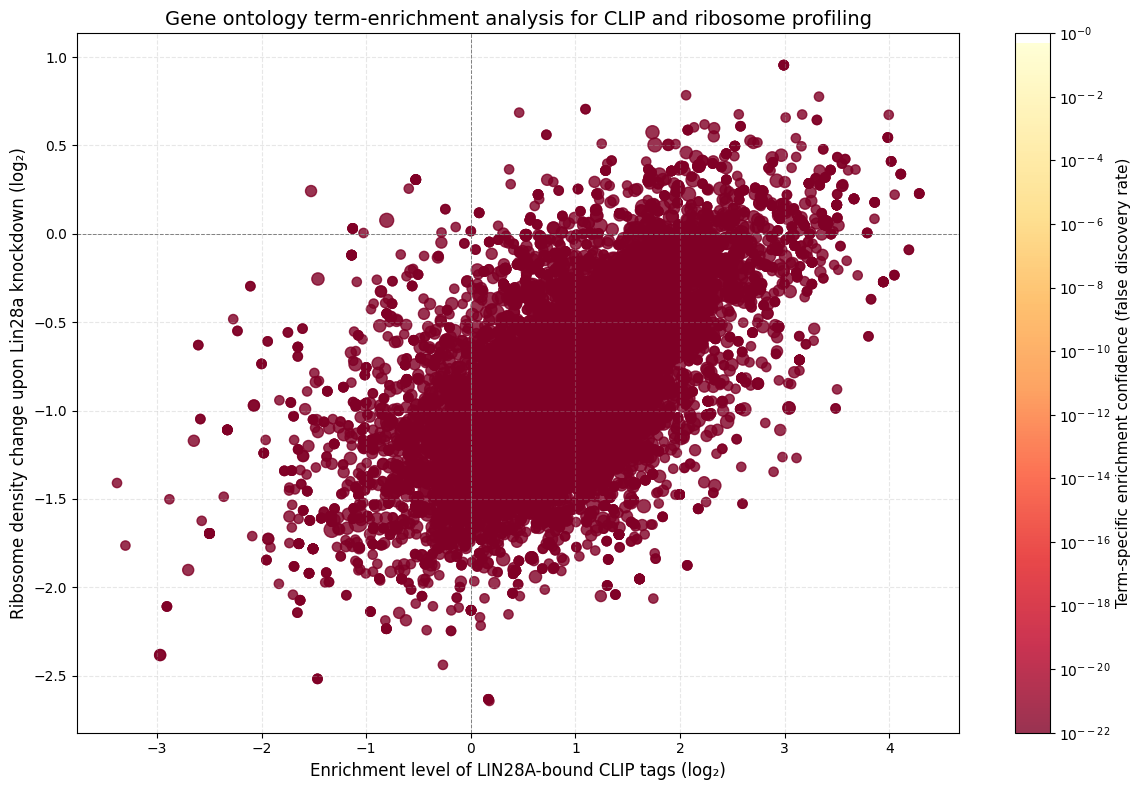

In [363]:
highlight_terms = [
    'extracellular region', 'endoplasmic reticulum', 'endoplasmic reticulum membrane',
    'glycosaminoglycan metabolic process', 'endoplasmic reticulum lumen', 'cell surface',
    'calcium ion binding', 'Golgi apparatus', 'nucleosome assembly', 'nucleosome',
    'mitochondrion', 'nucleus', 'cytoplasm'
]
highlight_df = go_summary[go_summary['GO_name'].isin(highlight_terms)]
go_summary['fdr_fixed'] = go_summary['fdr'].replace(0, 1e-22)
# 원 크기 조정용 스케일링 (더 과감하게 차이 표현)
min_size = 20
max_size = 300
size_scaled = (go_summary['n_genes'] - go_summary['n_genes'].min()) / (
    go_summary['n_genes'].max() - go_summary['n_genes'].min())
go_summary['point_size'] = (np.sqrt(go_summary['n_genes']) / np.sqrt(2000)) * 2000


fig, ax = plt.subplots(figsize=(12, 8))
sc = ax.scatter(
    go_summary['clip_enrichment_log2'],
    go_summary['rden_change_log2'],
    s=go_summary['point_size'],
    c=go_summary['fdr_fixed'],
    cmap='YlOrRd_r',
    norm=LogNorm(vmin=1e-22, vmax=0.5),
    alpha=0.8
)

# ax.set_xlim(-3.5, 4.5)  # 전체 분포 보여주고
# ax.set_ylim(-2.8, 1.0)  # 상위 1% 정도 여유

# ax.set_xlim(0.3, 1.5)
# ax.set_ylim(-1, 1.5)
# for _, row in highlight_df.iterrows():
#     label = f"{row['GO_name']} ({row['n_genes']})\nC={row['fdr']:.1e}"
#     ax.annotate(
#         label,
#         xy=(row['clip_enrichment_log2'], row['rden_change_log2']),
#         textcoords='offset points',
#         fontsize=9,
#         bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black', lw=0.5),
#         arrowprops=dict(arrowstyle='->', lw=0.5)
#     )

# 컬러바
cbar = fig.colorbar(sc, ax=ax)
cbar.set_label('Term-specific enrichment confidence (false discovery rate)', fontsize=11)
log_ticks = [10**(-i) for i in range(0, 23, 2)]
cbar.set_ticks(log_ticks)
cbar.ax.set_yticklabels([f"$10^{{-{int(np.log10(t))}}}$" for t in log_ticks])

# # 축 및 타이틀
ax.set_xlabel('Enrichment level of LIN28A-bound CLIP tags (log₂)', fontsize=12)
ax.set_ylabel('Ribosome density change upon Lin28a knockdown (log₂)', fontsize=12)
ax.set_title('Gene ontology term-enrichment analysis for CLIP and ribosome profiling', fontsize=14)
ax.axhline(0, linestyle='--', color='gray', linewidth=0.7)
ax.axvline(0, linestyle='--', color='gray', linewidth=0.7)
ax.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

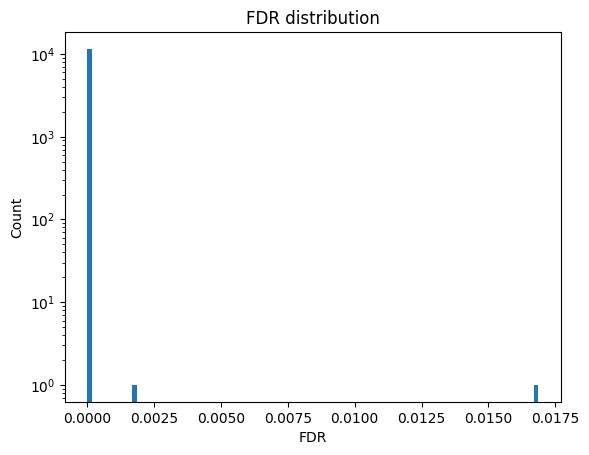

총 점 개수: 11503


In [324]:
plt.hist(go_summary['fdr'], bins=100, log=True)
plt.xlabel("FDR")
plt.ylabel("Count")
plt.title("FDR distribution")
plt.show()

print("총 점 개수:", len(go_summary))


In [352]:
# print(go_summary['clip_enrichment_log2'].describe())
# print(go_summary['rden_change_log2'].describe())
# print(go_summary['point_size'].describe())

print(go_summary['fdr'].describe())
# go_summary.head()
# high_gene_terms = go_summary[go_summary['n_genes'] >= 1000]
# print(high_gene_terms[['GO_name', 'n_genes', 'fdr']])

count    1.150300e+04
mean     8.590308e-19
std      9.202509e-17
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.869873e-15
Name: fdr, dtype: float64


In [368]:
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests

# 필요한 컬럼 필터
df = cnts_go[['GO_name', 'rden_change_log2', 'clip_enrichment_log2']].dropna()

# GO term 목록
terms = df['GO_name'].unique()
results = []

for term in terms:
    group1 = df[df['GO_name'] == term]
    group2 = df[df['GO_name'] != term]

    if len(group1) < 5 or len(group2) < 5:
        continue

    # Mann-Whitney U test on rden_change_log2
    stat, pval = mannwhitneyu(group1['rden_change_log2'], group2['rden_change_log2'], alternative='two-sided')

    results.append({
        'GO_name': term,
        'n_genes': len(group1),
        'pval': pval,
        'rden_change_log2_mean': group1['rden_change_log2'].mean(),
        'clip_enrichment_log2_mean': group1['clip_enrichment_log2'].mean()
    })

# 데이터프레임으로 정리
mw_df = pd.DataFrame(results)

# FDR 보정
mw_df['fdr'] = multipletests(mw_df['pval'], method='fdr_bh')[1]


In [371]:
mw_df.head()

,GO_name,n_genes,pval,rden_change_log2_mean,clip_enrichment_log2_mean,fdr,point_size
0,autophagosome assembly,19,1.656893e-01,-0.749103,0.928231,4.048017e-01,194.935887
1,negative regulation of apoptotic process,176,4.992055e-01,-0.962140,0.761844,7.314323e-01,593.295879
2,nucleus,2477,1.192933e-27,-1.060915,0.675600,5.308554e-25,2225.758298
3,protein binding,2207,5.860171e-05,-0.976645,0.752123,1.404187e-03,2100.952165
4,apoptotic process,287,4.423726e-01,-0.904643,0.708753,6.879634e-01,757.627877


In [382]:
mw_df_tmp2 = mw_df[mw_df['fdr'] <= 0.05]
mw_df_tmp = mw_df_tmp2.sort_values('fdr', ascending=False)

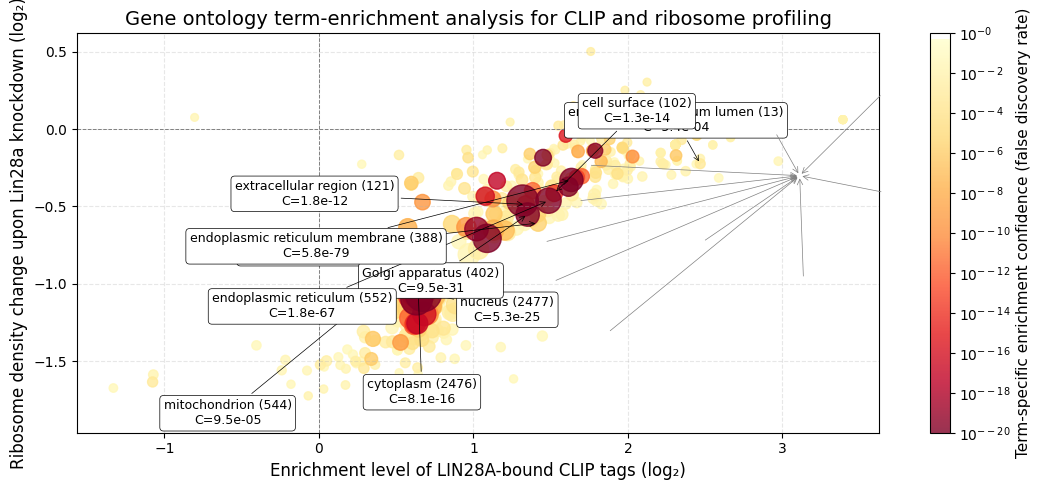

In [415]:
highlight_terms = [
    'extracellular region', 'endoplasmic reticulum', 'endoplasmic reticulum membrane',
    'glycosaminoglycan metabolic process', 'endoplasmic reticulum lumen', 'cell surface',
    'calcium ion binding', 'Golgi apparatus', 'nucleosome assembly', 'nucleosome',
    'mitochondrion', 'nucleus', 'cytoplasm'
]
highlight_df = mw_df_tmp[mw_df_tmp['GO_name'].isin(highlight_terms)]
mw_df_tmp['point_size'] = (np.sqrt(mw_df_tmp['n_genes']) / np.sqrt(50)) * 100


fig, ax = plt.subplots(figsize=(11, 5))
sc = ax.scatter(
    mw_df_tmp['clip_enrichment_log2_mean'],
    mw_df_tmp['rden_change_log2_mean'],
    s=mw_df_tmp['point_size'],
    c=mw_df_tmp['fdr'],
    cmap='YlOrRd_r',
    norm=LogNorm(vmax=0.5, vmin=1e-20),
    alpha=0.8
)

# ax.set_xlim(-3.5, 4.5)  # 전체 분포 보여주고
# ax.set_ylim(-2.8, 1.0)  # 상위 1% 정도 여유

# ax.set_xlim(-2, 5)
# ax.set_ylim(-1, 1.5)

from adjustText import adjust_text

texts = []
for _, row in highlight_df.iterrows():
    label = f"{row['GO_name']} ({row['n_genes']})\nC={row['fdr']:.1e}"
    text = ax.annotate(
        label,
        xy=(row['clip_enrichment_log2_mean'], row['rden_change_log2_mean']),
        xytext=(0, 0),  # 시작 위치 (0 offset)
        textcoords='offset points',
        fontsize=9,
        bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black', lw=0.5),
        arrowprops=dict(arrowstyle='->', lw=0.5)
    )
    texts.append(text)

# 자동 위치 조정 (여기서 겹침 최소화)
adjust_text(texts,
            only_move={'points': 'y', 'text': 'xy'},  # 세밀한 제어도 가능
            arrowprops=dict(arrowstyle='->', color='gray', lw=0.5),
            force_text=0.5, force_points=0.3, expand_text=(1.1, 1.2))

# for _, row in highlight_df.iterrows():
#     label = f"{row['GO_name']} ({row['n_genes']})\nC={row['fdr']:.1e}"
#     ax.annotate(
#     label,
#     xy=(row['clip_enrichment_log2_mean'], row['rden_change_log2_mean']),
#     xytext=(10, 10),  # ← 여기 추가!
#     textcoords='offset points',
#     fontsize=9,
#     bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black', lw=0.5),
#     arrowprops=dict(arrowstyle='->', lw=0.5)
# )


# 컬러바
cbar = fig.colorbar(sc, ax=ax)
cbar.set_label('Term-specific enrichment confidence (false discovery rate)', fontsize=11)
log_ticks = [10**(-i) for i in range(0, 21, 2)]
cbar.set_ticks(log_ticks)
cbar.ax.set_yticklabels([f"$10^{{-{int(np.log10(t))}}}$" for t in log_ticks])

# # 축 및 타이틀
ax.set_xlabel('Enrichment level of LIN28A-bound CLIP tags (log₂)', fontsize=12)
ax.set_ylabel('Ribosome density change upon Lin28a knockdown (log₂)', fontsize=12)
ax.set_title('Gene ontology term-enrichment analysis for CLIP and ribosome profiling', fontsize=14)
ax.axhline(0, linestyle='--', color='gray', linewidth=0.7)
ax.axvline(0, linestyle='--', color='gray', linewidth=0.7)
ax.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()